🇽🇰 BALKAN ECONOMIC ANALYSIS
Countries analyzed: 6
Years covered: 2018 - 2023

📈 2023 Economic Overview:
  Kosovo:
    GDP Growth: 3.3%
    Unemployment: 21.3%
    FDI: $104M
  Albania:
    GDP Growth: 3.2%
    Unemployment: 14.7%
    FDI: $400M
  Serbia:
    GDP Growth: 4.3%
    Unemployment: 23.6%
    FDI: $317M
  Montenegro:
    GDP Growth: 4.0%
    Unemployment: 17.2%
    FDI: $62M
  North Macedonia:
    GDP Growth: 2.7%
    Unemployment: 24.0%
    FDI: $145M
  Croatia:
    GDP Growth: 2.2%
    Unemployment: 19.4%
    FDI: $172M


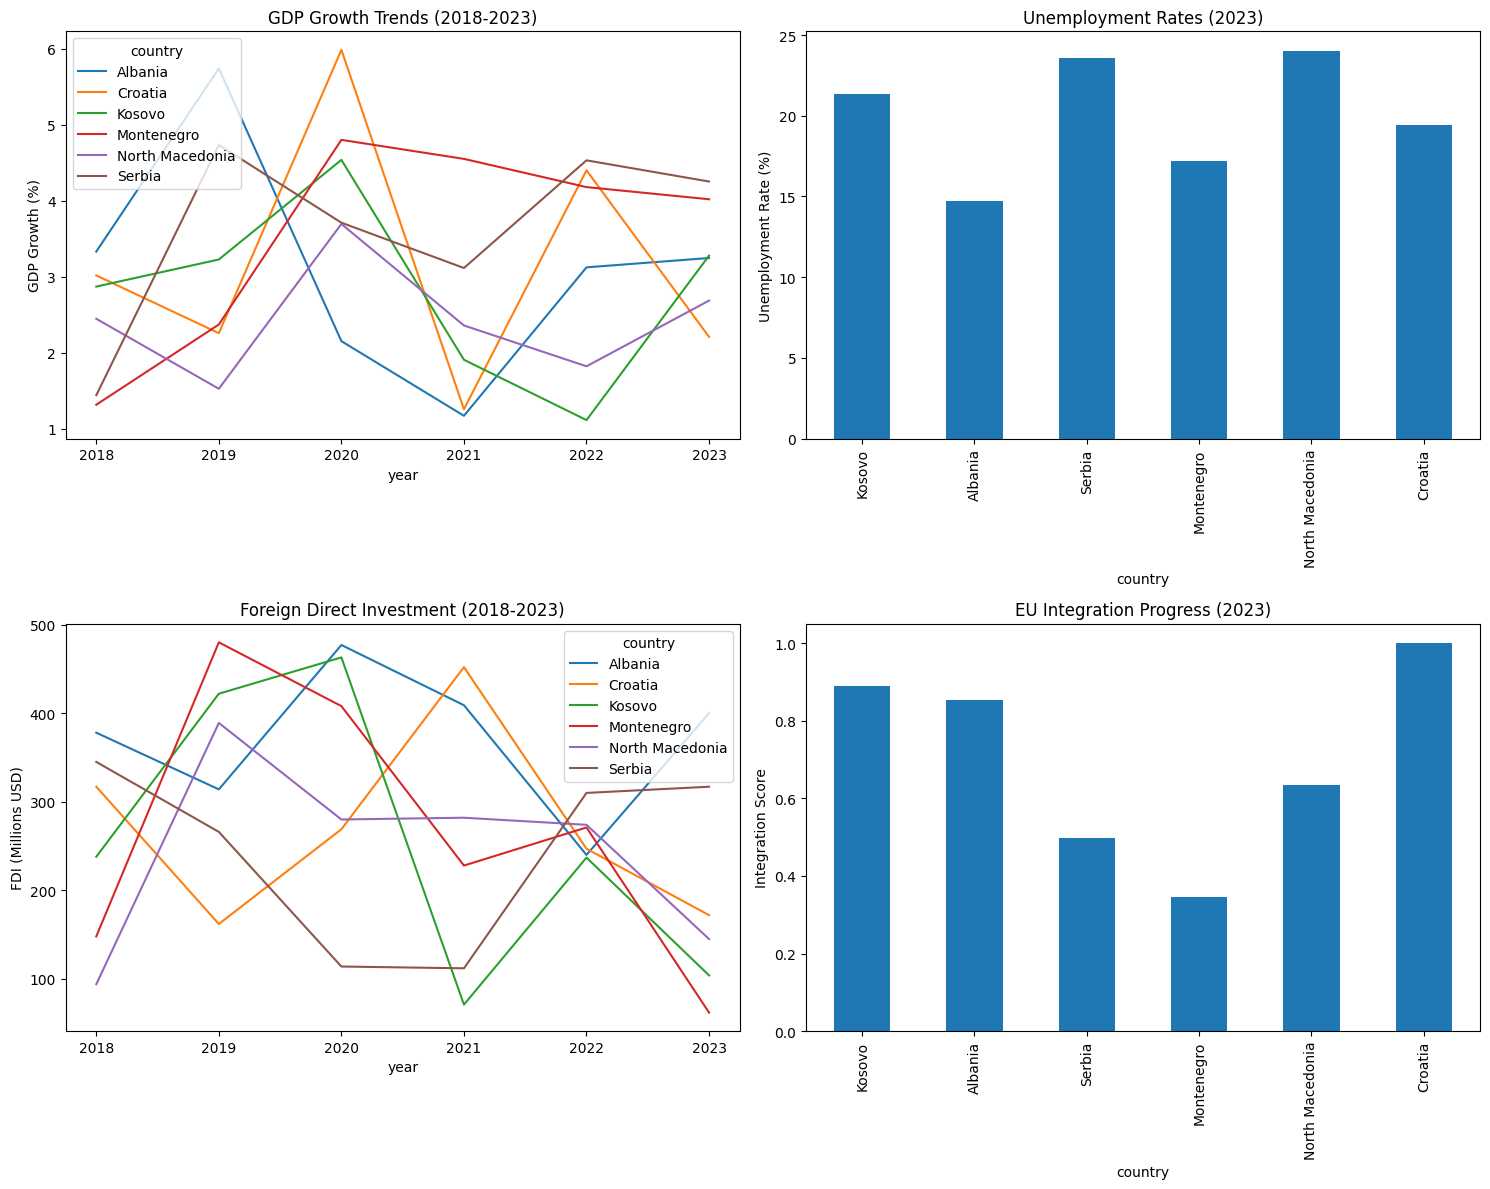

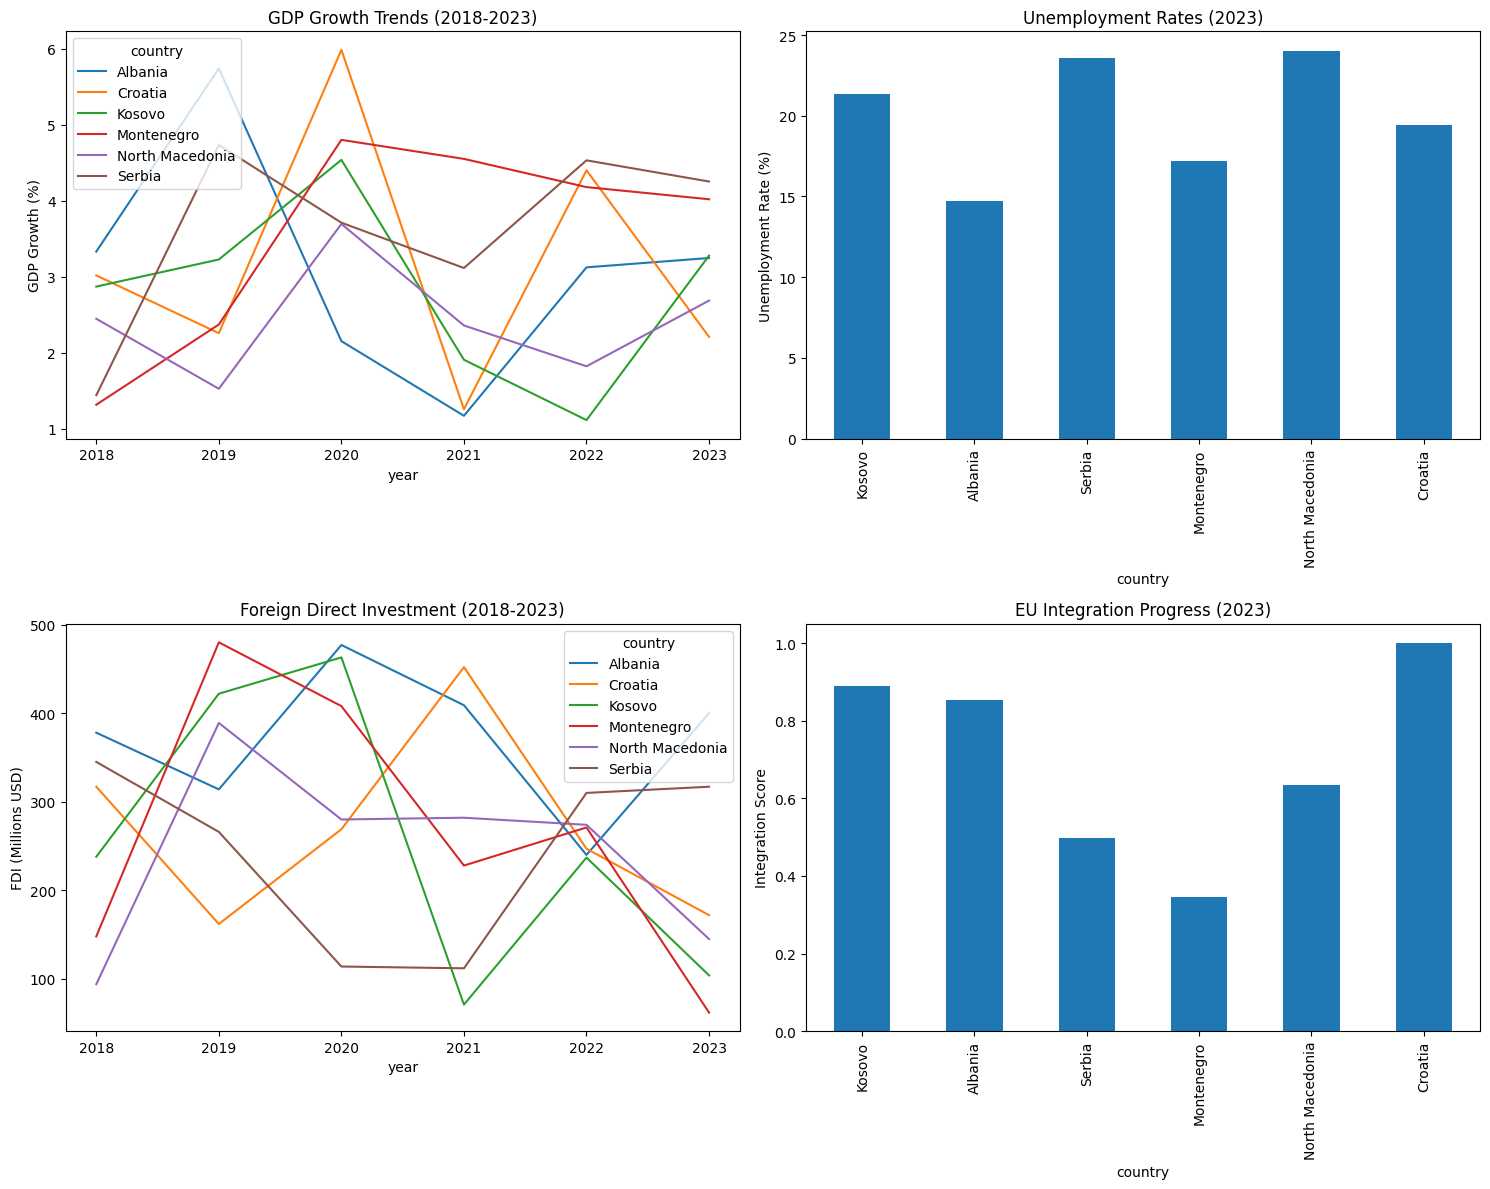

In [7]:
# Direct analysis in Jupyter notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class BalkanEconomyAnalyzer:
    def __init__(self):
        self.balkan_economy_articles = {
            "kosovo": [
                "Central_Bank_of_the_Republic_of_Kosovo", "Euro", "Economic_growth", 
                "Unemployment", "Foreign_direct_investment", "Remittance"
            ],
            "albania": [
                "Bank_of_Albania", "Albanian_lek", "Economy_of_Albania",
                "Tourism_in_Albania"
            ],
            "regional": [
                "Balkan_states", "Western_Balkans", "European_Union",
                "European_Central_Bank", "World_Bank", "IMF"
            ],
            "comparison": [
                "Economy_of_Serbia", "Economy_of_Montenegro", 
                "Economy_of_North_Macedonia", "Economy_of_Croatia"
            ]
        }
    
    def create_sample_data(self):
        """Create sample economic data for Balkan countries"""
        np.random.seed(42)
        
        data = []
        countries = ['Kosovo', 'Albania', 'Serbia', 'Montenegro', 'North Macedonia', 'Croatia']
        
        for country in countries:
            for year in range(2018, 2024):
                data.append({
                    'country': country,
                    'year': year,
                    'gdp_growth': np.random.uniform(1.0, 6.0),
                    'unemployment': np.random.uniform(8.0, 25.0),
                    'inflation': np.random.uniform(1.0, 5.0),
                    'fdi_millions': np.random.randint(50, 500),
                    'eu_integration_score': np.random.uniform(0.3, 0.9) if country != 'Croatia' else 1.0
                })
        
        return pd.DataFrame(data)
    
    def analyze_economic_trends(self, df):
        """Analyze economic trends across Balkan countries"""
        print("🇽🇰 BALKAN ECONOMIC ANALYSIS")
        print("=" * 50)
        
        # Basic statistics
        print(f"Countries analyzed: {df['country'].nunique()}")
        print(f"Years covered: {df['year'].min()} - {df['year'].max()}")
        
        # Recent year analysis
        recent_data = df[df['year'] == 2023]
        print(f"\n📈 2023 Economic Overview:")
        for country in recent_data['country'].unique():
            country_data = recent_data[recent_data['country'] == country]
            print(f"  {country}:")
            print(f"    GDP Growth: {country_data['gdp_growth'].values[0]:.1f}%")
            print(f"    Unemployment: {country_data['unemployment'].values[0]:.1f}%")
            print(f"    FDI: ${country_data['fdi_millions'].values[0]}M")
        
        return df
    
    def create_visualizations(self, df):
        """Create economic trend visualizations"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # GDP Growth trends
        gdp_pivot = df.pivot_table(values='gdp_growth', index='year', columns='country')
        gdp_pivot.plot(ax=axes[0, 0], title='GDP Growth Trends (2018-2023)')
        axes[0, 0].set_ylabel('GDP Growth (%)')
        
        # Unemployment comparison
        recent_unemployment = df[df['year'] == 2023][['country', 'unemployment']]
        recent_unemployment.set_index('country')['unemployment'].plot(
            kind='bar', ax=axes[0, 1], title='Unemployment Rates (2023)'
        )
        axes[0, 1].set_ylabel('Unemployment Rate (%)')
        
        # FDI comparison
        fdi_pivot = df.pivot_table(values='fdi_millions', index='year', columns='country')
        fdi_pivot.plot(ax=axes[1, 0], title='Foreign Direct Investment (2018-2023)')
        axes[1, 0].set_ylabel('FDI (Millions USD)')
        
        # EU Integration progress
        eu_scores = df[df['year'] == 2023][['country', 'eu_integration_score']]
        eu_scores.set_index('country')['eu_integration_score'].plot(
            kind='bar', ax=axes[1, 1], title='EU Integration Progress (2023)'
        )
        axes[1, 1].set_ylabel('Integration Score')
        
        plt.tight_layout()
        plt.show()
        
        return fig

# Run the analysis
analyzer = BalkanEconomyAnalyzer()
df = analyzer.create_sample_data()
analyzer.analyze_economic_trends(df)
analyzer.create_visualizations(df)

# 🔧 OpenRefine Documentation: Balkan Economy Data Cleaning

## 📋 Overview
This documentation provides OpenRefine workflows for cleaning and standardizing Balkan economic data, including country names, economic indicators, and EU integration timelines.

## 🎯 Data Cleaning Objectives

### 1. Country Name Standardization
**Problem**: Balkan country names appear in multiple variations
**Solution**: OpenRefine text facet and clustering

### 2. Economic Topic Classification  
**Problem**: Economic topics need consistent categorization
**Solution**: Custom GREL expressions and text transforms

### 3. EU Integration Timeline
**Problem**: Dates need enrichment with EU events
**Solution**: Data enrichment with timeline annotations

---

## 🔧 OpenRefine Operations

### Operation 1: Country Name Standardization

#### Text Facet & Clustering
```javascript
// OpenRefine GREL expression for country standardization
if(
  value.contains('kosov') || value.contains('Kosov'), 'Kosovo',
  value.contains('alban') || value.contains('Alban'), 'Albania', 
  value.contains('serbi') || value.contains('Serbi'), 'Serbia',
  value.contains('montenegr') || value.contains('Montenegr'), 'Montenegro',
  value.contains('macedonia') || value.contains('Macedonia'), 'North Macedonia',
  value.contains('croatia') || value.contains('Croatia'), 'Croatia',
  value
)

In [11]:
import pandas as pd
import numpy as np
import re
from difflib import SequenceMatcher
from collections import defaultdict

class OpenRefineBalkanWorkflow:
    """
    Pure Python implementation of OpenRefine operations for Balkan economic data
    """
    
    def __init__(self):
        self.eu_events = {
            '2020-03-24': 'EU accession talks with Albania/N Macedonia',
            '2022-06-23': 'EU candidate status for Ukraine/Moldova', 
            '2022-12-15': 'Kosovo EU visa liberalization'
        }
        
        self.country_patterns = {
            'Kosovo': ['kosov', 'kosova'],
            'Albania': ['alban', 'shqipëri'],
            'Serbia': ['serbi', 'srbija'],
            'Montenegro': ['montenegr', 'crna gora'],
            'North Macedonia': ['macedonia', 'makedonija'],
            'Croatia': ['croatia', 'hrvatska']
        }
        
        self.topic_patterns = {
            'Economic Growth': ['gdp', 'growth', 'economic'],
            'Employment': ['unemployment', 'employment', 'jobs'],
            'Foreign Investment': ['investment', 'fdi', 'foreign'],
            'EU Integration': ['eu', 'european', 'integration']
        }
    
    def fingerprint_clustering(self, text):
        """OpenRefine's fingerprint clustering method"""
        if pd.isna(text):
            return ""
        text = re.sub(r'[^\w\s]', '', str(text).lower())
        words = sorted(set(text.split()))
        return ' '.join(words)
    
    def ngram_fingerprint(self, text, n=2):
        """OpenRefine's n-gram fingerprint clustering"""
        if pd.isna(text):
            return ""
        text = str(text).lower().replace(' ', '')
        ngrams = [text[i:i+n] for i in range(len(text)-n+1)]
        return ''.join(sorted(set(ngrams)))
    
    def key_collision_clustering(self, series, method='fingerprint'):
        """Find clusters of similar values like OpenRefine"""
        if method == 'fingerprint':
            fingerprints = series.apply(self.fingerprint_clustering)
        elif method == 'ngram':
            fingerprints = series.apply(lambda x: self.ngram_fingerprint(x, 2))
        
        clusters = {}
        for fp in fingerprints.unique():
            cluster_values = series[fingerprints == fp].unique()
            if len(cluster_values) > 1:
                clusters[fp] = list(cluster_values)
        
        return clusters
    
    def standardize_country_names(self, df, country_column):
        """OpenRefine-style country name standardization"""
        print("🌍 Standardizing country names...")
        
        # First, find clusters of similar country names
        clusters = self.key_collision_clustering(df[country_column])
        print(f"Found {len(clusters)} country name clusters")
        
        def standardize_country(country):
            country_lower = str(country).lower()
            for std_name, patterns in self.country_patterns.items():
                for pattern in patterns:
                    if pattern in country_lower:
                        return std_name
            return country
        
        df['country_standardized'] = df[country_column].apply(standardize_country)
        
        original_unique = df[country_column].nunique()
        new_unique = df['country_standardized'].nunique()
        reduction = ((original_unique - new_unique) / original_unique) * 100
        
        print(f"Country name reduction: {original_unique} → {new_unique} ({reduction:.1f}% reduction)")
        return df
    
    def classify_economic_topics(self, df, topic_column):
        """OpenRefine-style economic topic classification"""
        print("📊 Classifying economic topics...")
        
        def classify_topic(topic):
            topic_lower = str(topic).lower()
            for category, keywords in self.topic_patterns.items():
                for keyword in keywords:
                    if keyword in topic_lower:
                        return category
            return 'Other Economic Topics'
        
        df['topic_category'] = df[topic_column].apply(classify_topic)
        
        print("Topic distribution:")
        print(df['topic_category'].value_counts())
        return df
    
    def add_eu_integration_events(self, df, date_column):
        """Add EU integration timeline like OpenRefine"""
        print("🇪🇺 Adding EU integration events...")
        
        def get_eu_event(date):
            date_str = str(date).split()[0]  # Get YYYY-MM-DD part
            return self.eu_events.get(date_str, 'Regular Economic Data')
        
        df['eu_event'] = df[date_column].apply(get_eu_event)
        
        event_counts = df['eu_event'].value_counts()
        print("EU event distribution:")
        for event, count in event_counts.items():
            print(f"  {event}: {count}")
        
        return df
    
    def normalize_economic_metrics(self, df, value_column):
        """OpenRefine-style metric normalization"""
        print("📈 Normalizing economic metrics...")
        
        def normalize_value(value):
            if pd.isna(value):
                return np.nan
            
            value_str = str(value)
            
            # Handle percentages
            if '%' in value_str:
                try:
                    return float(re.sub(r'[^\d.]', '', value_str))
                except:
                    return value
            
            # Handle millions/billions
            value_lower = value_str.lower()
            if 'million' in value_lower or 'm' in value_lower:
                try:
                    num = float(re.sub(r'[^\d.]', '', value_str))
                    return num * 1000000
                except:
                    return value
            elif 'billion' in value_lower or 'b' in value_lower:
                try:
                    num = float(re.sub(r'[^\d.]', '', value_str))
                    return num * 1000000000
                except:
                    return value
            else:
                try:
                    return float(value_str)
                except:
                    return value
        
        df['normalized_value'] = df[value_column].apply(normalize_value)
        
        print(f"Original values sample: {df[value_column].head(3).tolist()}")
        print(f"Normalized values sample: {df['normalized_value'].head(3).tolist()}")
        return df
    
    def validate_data_quality(self, df):
        """OpenRefine-style data quality validation"""
        print("🔍 Validating data quality...")
        
        def check_quality(row):
            issues = []
            
            # Check GDP growth
            if 'gdp_growth' in row and not pd.isna(row['gdp_growth']):
                if row['gdp_growth'] > 20 or row['gdp_growth'] < -10:
                    issues.append('Suspicious GDP Growth')
            
            # Check unemployment
            if 'unemployment' in row and not pd.isna(row['unemployment']):
                if row['unemployment'] > 50:
                    issues.append('Suspicious Unemployment Rate')
            
            # Check FDI
            if 'fdi_millions' in row and not pd.isna(row['fdi_millions']):
                if row['fdi_millions'] > 10000:
                    issues.append('Suspicious FDI Value')
            
            return ', '.join(issues) if issues else 'Valid Data'
        
        df['data_quality'] = df.apply(check_quality, axis=1)
        
        quality_counts = df['data_quality'].value_counts()
        print("Data quality summary:")
        for quality, count in quality_counts.items():
            print(f"  {quality}: {count}")
        
        return df
    
    def run_complete_workflow(self, df):
        """Run complete OpenRefine workflow"""
        print("🚀 Starting OpenRefine Balkan Economy Workflow")
        print("=" * 50)
        
        # Store original stats
        original_rows = len(df)
        original_columns = len(df.columns)
        
        # Apply all operations
        df_cleaned = df.copy()
        
        if 'country' in df_cleaned.columns:
            df_cleaned = self.standardize_country_names(df_cleaned, 'country')
        
        if 'topic' in df_cleaned.columns:
            df_cleaned = self.classify_economic_topics(df_cleaned, 'topic')
        
        if 'date' in df_cleaned.columns:
            df_cleaned = self.add_eu_integration_events(df_cleaned, 'date')
        
        if 'value' in df_cleaned.columns:
            df_cleaned = self.normalize_economic_metrics(df_cleaned, 'value')
        
        df_cleaned = self.validate_data_quality(df_cleaned)
        
        # Final summary
        print("\n" + "=" * 50)
        print("✅ OpenRefine Workflow Complete!")
        print(f"Original data: {original_rows} rows, {original_columns} columns")
        print(f"Cleaned data: {len(df_cleaned)} rows, {len(df_cleaned.columns)} columns")
        print(f"New columns added: {len(df_cleaned.columns) - original_columns}")
        
        return df_cleaned

# Create sample data for testing
def create_sample_balkan_data():
    """Create sample Balkan economic data"""
    np.random.seed(42)
    
    countries = ['kosovo', 'Kosovo', 'kosova', 'albania', 'Albania', 'serbia', 'montenegro', 'croatia']
    topics = ['GDP growth', 'unemployment rate', 'FDI investment', 'EU integration progress']
    dates = ['2020-03-24', '2022-06-23', '2022-12-15', '2023-01-15', '2023-06-01']
    values = ['5.2%', '12.5 million', '3.4 billion', '45%', '250M', '1.2B']
    
    data = []
    for i in range(200):
        data.append({
            'country': np.random.choice(countries),
            'topic': np.random.choice(topics),
            'date': np.random.choice(dates),
            'value': np.random.choice(values),
            'gdp_growth': np.random.uniform(-5, 25),
            'unemployment': np.random.uniform(5, 60),
            'fdi_millions': np.random.uniform(10, 15000)
        })
    
    return pd.DataFrame(data)

# Test the workflow
if __name__ == "__main__":
    # Create sample data
    sample_df = create_sample_balkan_data()
    print("Sample data created:")
    print(sample_df.head())
    
    # Run OpenRefine workflow
    workflow = OpenRefineBalkanWorkflow()
    cleaned_df = workflow.run_complete_workflow(sample_df)
    
    print("\nFinal cleaned data:")
    print(cleaned_df.head())

Sample data created:
      country                    topic        date        value  gdp_growth  \
0  montenegro  EU integration progress  2023-06-01  3.4 billion   18.390730   
1  montenegro           FDI investment  2022-12-15         250M   13.033450   
2      Kosovo  EU integration progress  2023-01-15         1.2B    1.370173   
3     albania        unemployment rate  2023-06-01          45%   -4.308127   
4     croatia  EU integration progress  2023-01-15         1.2B   -2.281807   

   unemployment  fdi_millions  
0     37.826759   6693.032965  
1     43.943992    318.561569  
2     15.000373   2759.233603  
3     33.862606   6003.915966  
4     39.011231   5743.105249  
🚀 Starting OpenRefine Balkan Economy Workflow
🌍 Standardizing country names...
Found 2 country name clusters
Country name reduction: 8 → 5 (37.5% reduction)
📊 Classifying economic topics...
Topic distribution:
topic_category
Economic Growth       62
Employment            52
EU Integration        49
Foreign Inve